Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [1]:
import pandas as pd
from pathlib import Path
import os
import os.path
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
Flowers_All_Path = Path("../datasets/flowers")

In [3]:
Flowers_Path = list(Flowers_All_Path.glob(r"*/*.jpg"))

In [4]:
Flowers_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Flowers_Path))


In [5]:
image_path = pd.Series(Flowers_Path,name="ImagePath").astype(str)

In [6]:
image_lables = pd.Series(Flowers_Labels,name="Type")

In [7]:
display(image_path.head())

0    ..\datasets\flowers\daisy\100080576_f52e8ee070...
1    ..\datasets\flowers\daisy\10140303196_b88d3d6c...
2    ..\datasets\flowers\daisy\10172379554_b296050f...
3    ..\datasets\flowers\daisy\10172567486_2748826a...
4    ..\datasets\flowers\daisy\10172636503_21bededa...
Name: ImagePath, dtype: object

In [8]:
df = pd.concat([image_path,image_lables],axis=1)

In [9]:
df

,ImagePath,Type
0,..\datasets\flowers\daisy\100080576_f52e8ee070...,daisy
1,..\datasets\flowers\daisy\10140303196_b88d3d6c...,daisy
2,..\datasets\flowers\daisy\10172379554_b296050f...,daisy
3,..\datasets\flowers\daisy\10172567486_2748826a...,daisy
4,..\datasets\flowers\daisy\10172636503_21bededa...,daisy
...,...,...
4318,..\datasets\flowers\tulip\9831362123_5aac525a9...,tulip
4319,..\datasets\flowers\tulip\9870557734_88eb3b9e3...,tulip
4320,..\datasets\flowers\tulip\9947374414_fdf1d0861...,tulip
4321,..\datasets\flowers\tulip\9947385346_3a8cacea0...,tulip


In [10]:
df = df.sample(frac=1).reset_index(drop=True)

In [11]:
df

,ImagePath,Type
0,..\datasets\flowers\rose\8209458141_38f38be65c...,rose
1,..\datasets\flowers\rose\10503217854_e66a80430...,rose
2,..\datasets\flowers\daisy\34720703615_bdf1335d...,daisy
3,..\datasets\flowers\daisy\34076975155_1faeedec...,daisy
4,..\datasets\flowers\rose\5273722065_c85d8543c2...,rose
...,...,...
4318,..\datasets\flowers\sunflower\8249000137_eddff...,sunflower
4319,..\datasets\flowers\daisy\10300722094_28fa9788...,daisy
4320,..\datasets\flowers\sunflower\5923085671_f81dd...,sunflower
4321,..\datasets\flowers\dandelion\9965757055_ff01b...,dandelion


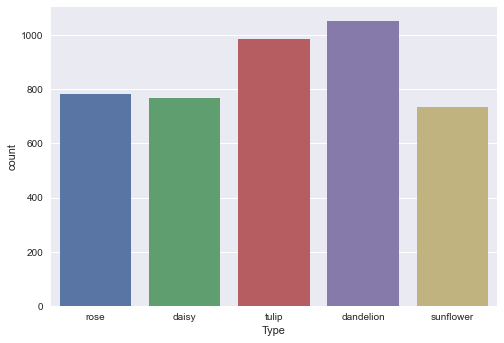

In [12]:
plt.style.use('seaborn')
sns.countplot(x='Type', data=df)
plt.show()

Text(0.5, 1.0, 'rose')

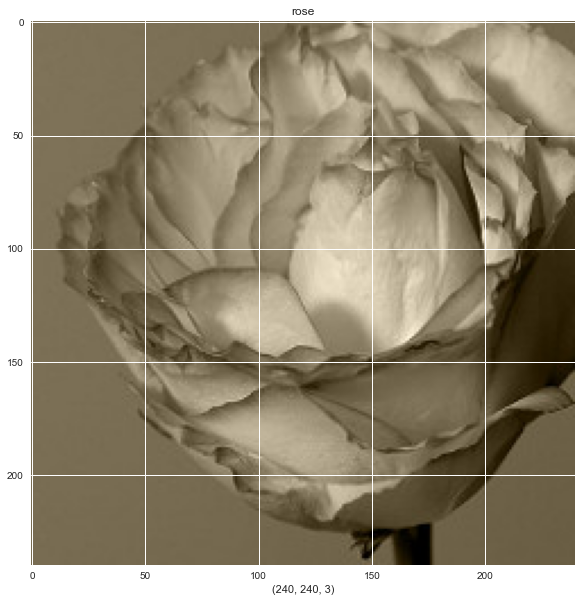

In [13]:
figure = plt.figure(figsize=(10,10))
x = plt.imread(df["ImagePath"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(df["Type"][0])

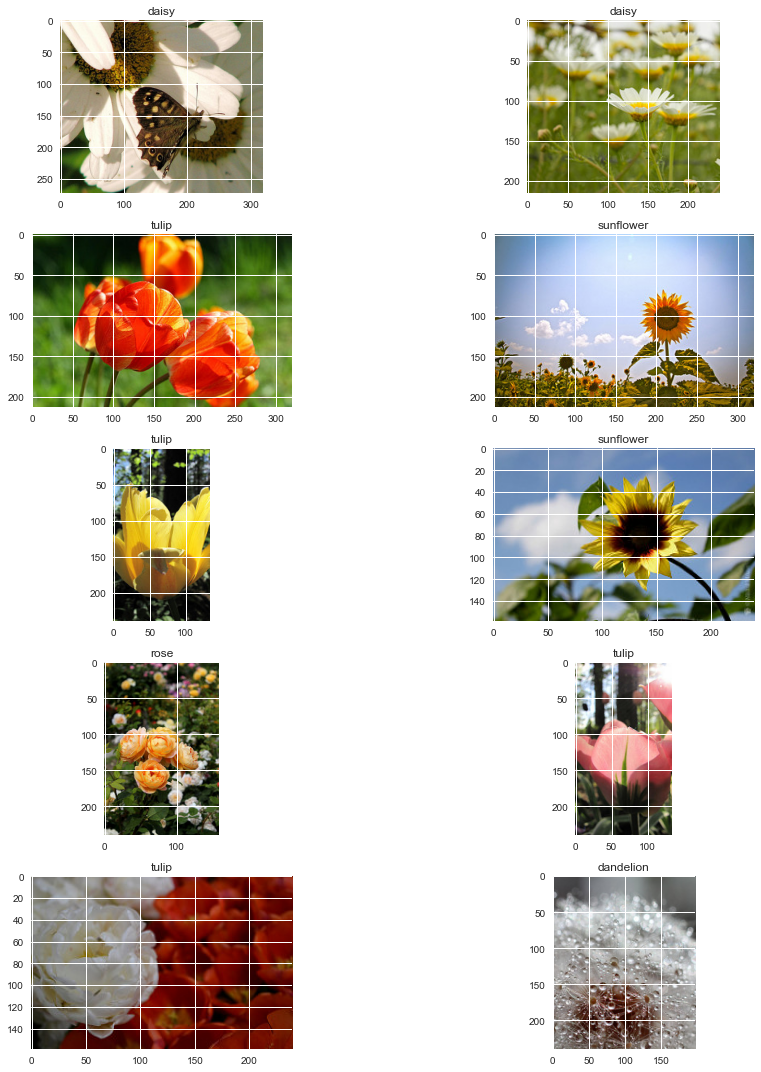

In [14]:
import random
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(df[['Type']].values))
        ax[i,j].imshow(plt.imread(df.iloc[l,0]))
        ax[i,j].set_title(df.iloc[l,1])
        
plt.tight_layout()

In [15]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np
le = LabelEncoder()

In [16]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [17]:
y = le.fit_transform(y)
y = to_categorical(y, 6)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout

In [20]:
X_train.shape

(2593,)

In [21]:
import tensorflow as tf

In [22]:
model = Sequential()

In [23]:
input_size = (256, 256)
model.add(Conv2D(32, (3, 3), input_shape=(256,256,3), activation='relu'))

In [24]:
model.add(MaxPooling2D(pool_size=(2, 2)))


In [25]:
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [26]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [27]:
model.add(Flatten())

In [28]:
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=6, activation='softmax'))

In [29]:
# opt = Adam(lr=1e-3, decay=1e-6)
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
script_dir = os.path.dirname(".")
training_set_path = os.path.join(script_dir, '../datasets/flowers/')
test_set_path = os.path.join(script_dir, '../datasets/flowers/')

In [32]:
batch_size = 64

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.33)

training_set = train_datagen.flow_from_directory(training_set_path,
                                                 target_size=input_size,
                                                 batch_size=batch_size,
                                                 subset="training",
                                                 class_mode='categorical')


test_set = test_datagen.flow_from_directory(test_set_path,
                                            target_size=input_size,
                                            batch_size=batch_size,
                                            subset="validation",
                                            class_mode='categorical')

Found 8646 images belonging to 6 classes.
Found 2850 images belonging to 6 classes.


In [33]:
print(os.listdir("../datasets/flowers/"))

['daisy', 'dandelion', 'flowers', 'rose', 'sunflower', 'tulip']


In [34]:
history = model.fit(training_set,
                         steps_per_epoch=1000/batch_size,
                         epochs=90,
                         validation_data=test_set,
                         validation_steps=100/batch_size,
                         workers=12)

Epoch 1/90
15/15 [==============================] - 38s 2s/step - loss: 2.0538 - accuracy: 0.3262 - val_loss: 1.6351 - val_accuracy: 0.4062
Epoch 2/90
15/15 [==============================] - 41s 3s/step - loss: 1.5683 - accuracy: 0.4792 - val_loss: 1.4722 - val_accuracy: 0.5469
Epoch 3/90
15/15 [==============================] - 44s 3s/step - loss: 1.5411 - accuracy: 0.4508 - val_loss: 1.5221 - val_accuracy: 0.4375
Epoch 4/90
15/15 [==============================] - 44s 3s/step - loss: 1.4139 - accuracy: 0.5078 - val_loss: 1.4419 - val_accuracy: 0.4688
Epoch 5/90
15/15 [==============================] - 42s 3s/step - loss: 1.4062 - accuracy: 0.5518 - val_loss: 1.4261 - val_accuracy: 0.4141
Epoch 6/90
15/15 [==============================] - 38s 2s/step - loss: 1.4313 - accuracy: 0.4864 - val_loss: 1.3746 - val_accuracy: 0.5000
Epoch 7/90
15/15 [==============================] - 39s 2s/step - loss: 1.4704 - accuracy: 0.4552 - val_loss: 1.3845 - val_accuracy: 0.4609
Epoch 8/90
15/15 [==